In [18]:
import pandas as pd
import numpy as np

In [19]:
dataset=pd.read_csv("Placement.csv")

# 1. replacement of nan values

In [22]:
dataset.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [23]:
dataset["salary"].fillna(0,inplace=True)

# we r only using dataset.fillna() here cos the nan values in salary are because the employees r not placed in the company,

#if they were place and the we hv to find the value then we can use dataset["salary"].fillna(dataset["salary"].mean(),inplace=True)
# for categorical data we use mode only if the employee or that category is related to the dataset.

In [32]:
dataset.isna().sum()# this is to find the nan values or null values under a category or a column

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [33]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# 2. How many of them are not placed?

In [39]:
# for this we know 67 ppl r not placed because their status is not placed and their salary is o.
dataset["status"].value_counts()
#when we use any data["columnname"].value_counts() we get how many unique features r there in that particular column and the 
#datatype.

Placed        148
Not Placed     67
Name: status, dtype: int64

# 3. Find the reason for non placement from the dataset?

In [47]:
dataset.groupby("status").mean()

# we r using groupby() function from pandas to group status to placed and notplaced and then to find mean whivh finds the mean 
#of only quantitative data.

# from this we can see the not placed ppl scored lesss compared to placed ppl.

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
status,,,,,,,
Not Placed,110.477612,57.544030,58.395522,61.134179,69.587910,61.612836,0.000000
Placed,106.878378,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405


# 4.What kind of relation between salary and mba_p

In [48]:
dataset[["salary","mba_p"]].corr()# here we r analysing 2 data so its bivariate analysis and we hv to find correlation of the 2.

,salary,mba_p
salary,1.000000,0.139823
mba_p,0.139823,1.000000


In [49]:
#the relation btw salary and mba_p is correlation btw them, which is 0.139823 and which means its less than 0.54 so almost 
#nearly no significant correlatio as the low degree positive correlation value should be approx 0.54

# 5. Which specialization is getting minimum salary?

In [60]:
#here also we r analysing 2 columns so it falls under bivariate analysis.
dataset.groupby("specialisation")["salary"].mean().min()

# to find min salary first we group the dataset by specialisation cos groupby can only be used with categoricaldata and 
#then we find mean () of salaries of both specialisation,cos without mean it will return 0 cos of null values turned to 0.
#then we find min() out of these which returns the least slary but if we use idxmin() it gives the index name with min. slary also.


150842.1052631579

In [61]:
dataset.groupby("specialisation")["salary"].mean().idxmin()

'Mkt&HR'

# 6. How many of them getting above 500000 salary?

In [69]:
salary=[]
for i in dataset["salary"]:
    if i>500000:
        salary.append(i)
 # here first we create a for loop to satify the condition and then a list is created
# we then find the length of the list to see how many elements r there in the list(which is for both categorical and quantitative data)
# to find the sum of all elements in side a list we do sum(list)
    
    
    

In [76]:
len(salary)

3

# 7. Test the Analysis of Variance between etest_p and mba_p at signifance
# level 5%.(Make decision using Hypothesis Testing)

In [79]:
# now this also comes under bivariate analysis as we r comparing 2 columns. 
# to check ANOVA btw etest_p and mba_p we use 1 way classification cos we need to analyse for 2 categories
#y we r using 1 way classification is because we r findinding the variance of etest_ p at different mba_p which is a categorical data.

In [82]:
import scipy.stats as stats  #here we r importing stats module from scipy 
stats.f_oneway(dataset["etest_p"],dataset["mba_p"]) # here we calling f_oneway function from stats to analyse the variance
#between the etest_p column and mba_p from dataset.
# this has given us the t value and the p value 

#p value = 4.6 which is > 0.05 so we accept null hypothesis cos thesres no significant variance btw them.



F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

# we dont do the above method

In [ ]:
# for ANOVA and ttest to find similarities or variance the main column or the category should be categorical data and the other 
#should be quantitative. eg: if we want to find variance btw salary and specialisation. in our dataframe we hv 2 specialisation a
#and we hv to analyse how salary varies with each specialisation.


# for hypothesis testing is applicable to ANOVA,ttest and correlation(where u can find relation even btw 2 quantitative datas.)

In [84]:
median_val=dataset["mba_p"].median() 

#so we find median cos mean gives results based on outliers ,mode gives the most commonly occuring value and not a actual split, 

#so median is the best as it gives the middle value or the midpoint.

In [89]:
low_mba=dataset[dataset["mba_p"]<=median_val]["etest_p"]
# here we r categorising mba_p to low and high based on the median value

In [90]:
high_mba=dataset[dataset["mba_p"]>median_val]["etest_p"]

In [92]:
from scipy.stats import ttest_ind# we r importing ttest_ind from scipy.stats.

#we r using independent ttest cos we r analysing the similarities btw etest_p and 2 different gps of mba_p

ttest_ind(low_mba,high_mba)

Ttest_indResult(statistic=-2.837334437471584, pvalue=0.004988540596357367)

In [ ]:
# here p value is 0.004988540596357367which is less than 0.05 so we accept null hypothesis.

# 8. Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make
# decision using Hypothesis Testing)


In [94]:
# since we have to find similarities we use ttest 

# we have to find similarity btw degree_t(Sci&Tech) and specialisation(Mkt&HR) wrt salary which r 2 different groups 
#so we use independent Ttest.

In [95]:
dataset["degree_t"].value_counts() # we do this first as to get the unique vlue names to prevent error.

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [101]:
from scipy.stats import ttest_ind as t # ttest_ind imported and given a short form to make it easier.
gp1=dataset[dataset["degree_t"]=="Sci&Tech"]["salary"]

In [102]:
dataset["specialisation"].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [103]:
gp2=dataset[dataset["specialisation"]=="Mkt&HR"]["salary"]

In [104]:
t(gp1,gp2)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)

In [105]:
# here p value is .007 which is very much less than 0.05 so we accept null hypothesis and there is significant variance in 
# salaries btw Sci&Tech and Mkt&HR.

# 9. Convert the normal distribution to standard normal distribution for salary column


In [ ]:
#if our data is normal we already have a normal distribution which can be converted to standard distribution by calculating zscore.

In [142]:
def standrd_norm_dist(column_data):
    mean=column_data.mean()
    std=column_data.std()
    values=[value for value in column_data]
   
    z=[((value-mean)/std) for value in values]# this gives the value which explains how much a salary in the salary column is 
    # far away from the mean, for each salary in the particular column.
    
    z_mean=sum(z)/len(z)# we need this to find the mean of all the z_score for each salary in the column.
    
   
    
    return z_mean
    

In [143]:
std_sal=standrd_norm_dist(dataset["salary"])
# here the mean of z_score is almost 0 which mean the salary is standardised 

In [144]:
std_sal

-7.126082669687051e-17

In [145]:
stdrd_sal=(dataset["salary"]-dataset["salary"].mean())/dataset["salary"].std()

In [146]:
stdrd_sal.std()# here the std= nearly 1 so dataset["salary"] is standardised.

0.9999999999999999

# 10. What is the probability Density Function of the salary range from
# 700000 to 900000?

In [152]:
from scipy.stats import norm #import norm fro scipy.stats for findinding the normal distribution of dataset[salary] only if 
#the data follows a normal distribution.

    
mean=dataset["salary"].mean()# find the mean of dataset 
std=dataset["salary"].std()
dist=norm(mean,std)# it creates the normal distribution using mean and std
values=[value for value in range(700000,900000)]
pd=[dist.pdf(value) for value in values]# to find the pdf of each salary value btw 700000 and 900000
prob=sum(pd)# this gives the area btw the 2 points
print("the area between ({},{}):{}".format(700000,900000,prob))

the area between (700000,900000):0.0005973310593974868


In [154]:
# but to find the pdf we hv to draw a graph
import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\nimmy\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


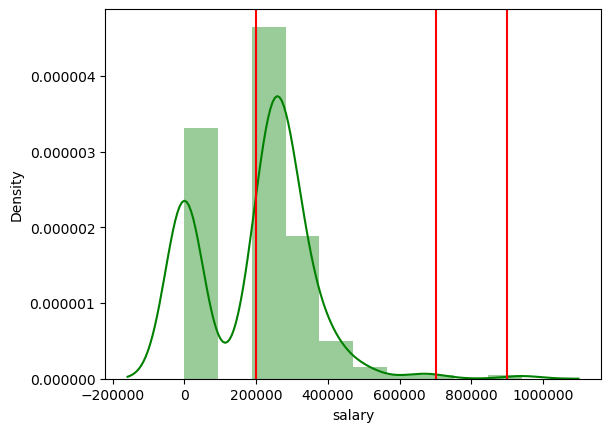

In [162]:
sns.distplot(dataset["salary"],kde={"color":"blue"},color="green")
plt.axvline(x=dataset["salary"].mean(),color="red",label="mean")
plt.axvline(x=700000,color="red",label="strt_range")
plt.axvline(x=900000,color="red",label="end_range")

In [163]:
# here we can see pddf at 700000 is higher as it has more salary values along the same range when compared to 900000.

# 11. Test the similarity between the degree_t(Sci&Tech)with respect to
# etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [164]:
# to find the similarity means we have to find t test
dataset["degree_t"].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [175]:
from scipy.stats import ttest_ind as t
# here we r doing indipendent ttest because we r finding similarities btw etest and mba_p in Sci&Tech.
gp1=dataset[dataset["degree_t"]=="Sci&Tech"]["etest_p"]

In [174]:
gp2=dataset[dataset["degree_t"]=="Sci&Tech"]["mba_p"]

In [178]:
t(gp1,gp2)

Ttest_indResult(statistic=4.532000225151251, pvalue=1.4289217003775636e-05)

In [179]:
# her the pvalue is pvalue=1.4289217003775636e-05 is less than .05 so there significant difference btw gp1 and gp2


# 12. Which parameter is highly correlated with salary?

In [180]:
dataset.corr() # gives the correlation btw quantitative data

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [182]:
sal_cor=dataset.corr()["salary"]# gives correlation of quantitative columns with salary.

In [186]:
sal_cor # so from here its clearly visivle salary is highly correlated with itself cos its the same feature. 
#after that it is ssc_p  0.538090

sl_no       0.002543
ssc_p       0.538090
hsc_p       0.452569
degree_p    0.408371
etest_p     0.186988
mba_p       0.139823
salary      1.000000
Name: salary, dtype: float64

In [187]:
sal_cor.idxmax()

'salary'

# 13.  plot any useful graph and explain it.

In [188]:
# standard normal distribution graph of dataset["hsc_p"]

In [198]:
def standrd_norm_dist(column_data):
    mean=column_data.mean()
    std=column_data.std()
    values=[value for value in column_data]
   
    z=[((value-mean)/std) for value in values]# this gives the value which explains how much a hsc_p in the hsc_p column is 
    # far away from the mean, for each hsc_p in the particular column.
    
    z_mean=sum(z)/len(z)# we need this to find the mean of all the z_score for each hsc_p in the column.
    import seaborn as sns #this helps in giving us the bell curve and histogram when the data is normal
    from matplotlib import pyplot as plt# this helps in labeling drawing vertical lines on the curve
    sns.distplot(z,kde=True,kde_kws={"color":"blue"},color="green")# this gives the bell curve as blue and histogram as green.
    plt.title("standard normal distribution")
    plt.axvline(x=z_mean,color="red",label="mean") #this marks the mean, where z_mean is the standardised mean.
   
    
    return z_mean
    

C:\Users\nimmy\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == "":


-9.320709578829803e-16

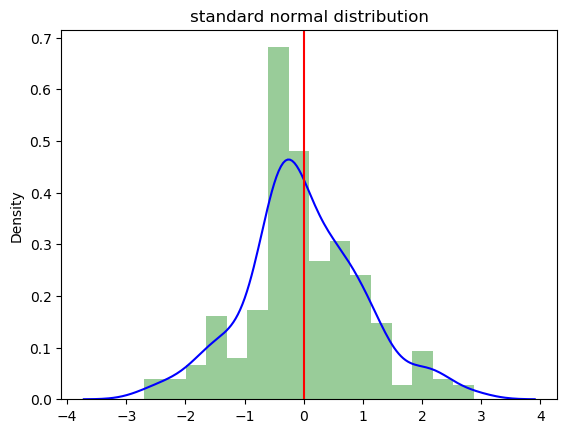

In [199]:
standrd_norm_dist(dataset["hsc_p"])

In [203]:
# to calculate the standardised standard deviation:
# first we calculate strdsd data :
 
strdsd_dataset=(dataset["hsc_p"]-dataset["hsc_p"].mean())/dataset["hsc_p"].std()

In [204]:
strdsd_dataset.std()

1.0

In [ ]:
# which is perfectly = 1 so for a normal distribution to be standard normal distribution the criteria should be mean=0 std=1.